# Computing Lyapunov Exponent of an ESN

This is a notebook for computing Lyapunov Exponent for an Echo State Network and study the relationship between the structural properties of the network and its dynamic regime.

__The dynamics of the network is varied by varying:__

    1. standard deviation of the reservoir weights
    2. leak rate of the reservoir
    3. reservoir size
    

#### Importing Libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
import pickle

from esn_cell import *
# from ddeint import ddeint

import os
os.getcwd()

np.set_printoptions(threshold=sys.maxsize)

ModuleNotFoundError: No module named 'esn_cell'

#### Defining ESN Parameters

In [2]:
res_units = [50,75,100,125,150]
in_units = 1

activation = np.tanh
leak_rates = [0.2,0.4,0.8,1.0]

sparsity = 0.1


# Reservoir Weights Standard Deviations

list_weights_std=[]
r = 10
for power in range(7):
    if power==6:
        r=4
    for i in range(1,r):
        list_weights_std.append(i*(np.power(10,power))*1e-5)
        if power==5:
            list_weights_std.append(i*(np.power(10,power))*1e-5 + 0.5)
            

print(list_weights_std)
len(list_weights_std)

[1e-05, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008, 0.0009000000000000001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.02, 0.030000000000000002, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09000000000000001, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0000000000000004, 3.5000000000000004, 4.0, 4.5, 5.0, 5.5, 6.000000000000001, 6.500000000000001, 7.000000000000001, 7.500000000000001, 8.0, 8.5, 9.0, 9.5, 10.0, 20.0, 30.000000000000004]


66

In [6]:
# Input of ESN
esn_input = np.random.uniform(-0.1, 0.1, size=[2000, in_units])

# # Order of Perturbation of ESN
# perturbation_order = [1e-12, 1e-10, 1e-8]

In [9]:
dyn_complexity = pd.DataFrame(columns=['Reservoir_Size', 'Leak_Rate', 'Weights_SD',\
                                  'Spectral_Radius', 'Lyapunov_Exponent', 'Nof_Samples_(%)'])

n = 0

start = time.time()

for res_size in res_units:    
    
    ESN_arch = [in_units, res_size, 0]
    init_esn = np.zeros([1, res_size])
        
    for alpha in leak_rates:

        for std in list_weights_std:

            esn = ESN(ESN_arch, activation, alpha, weights_std=std, sparsity=sparsity)

            LE, perc_nof_samples = esn.lyapunov_exponent(compute_res_states=True, inputs=esn_input, init_state=init_esn)
            # 'perc_nof_samples' stores the percentage of the total number of samples used in computing the local
            # lyapunov exponent of the ESNs. The total number of samples equal the length of the input time series
            # used after initial transient times the number of neurons in the reservoir. See: esn_cell.py
            
            dyn_complexity.loc[n] = [res_size, alpha, std, esn.spectral_radius, LE, perc_nof_samples]
            
            with open('random_reservoirs_LE.pickle', 'wb') as f:
                pickle.dump(dyn_complexity, f)  

            n+=1

print(time.time()-start)


TypeError: 'NoneType' object is not subscriptable

### Spectral Radius vs LE

<IPython.core.display.Javascript object>


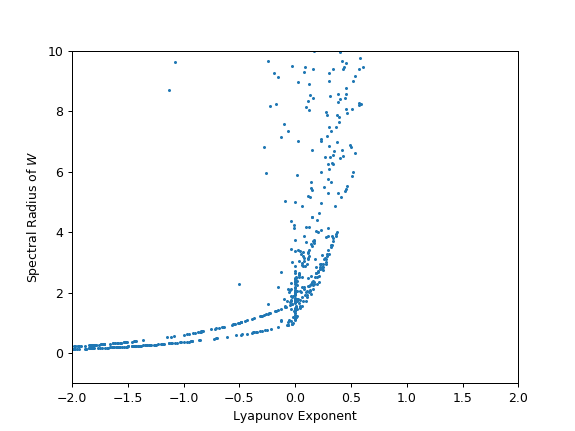

In [42]:
plt.scatter(dyn_complexity[['Lyapunov_Exponent']].values, dyn_complexity[['Spectral_Radius']].values, s=2)
plt.xlabel('Lyapunov Exponent')
plt.ylabel('Spectral Radius of $\mathbf{\mathit{W}}$')
plt.xlim(-2, 2)
plt.ylim(-1, 10)
plt.show()


### LE vs Weights Standard Deviation

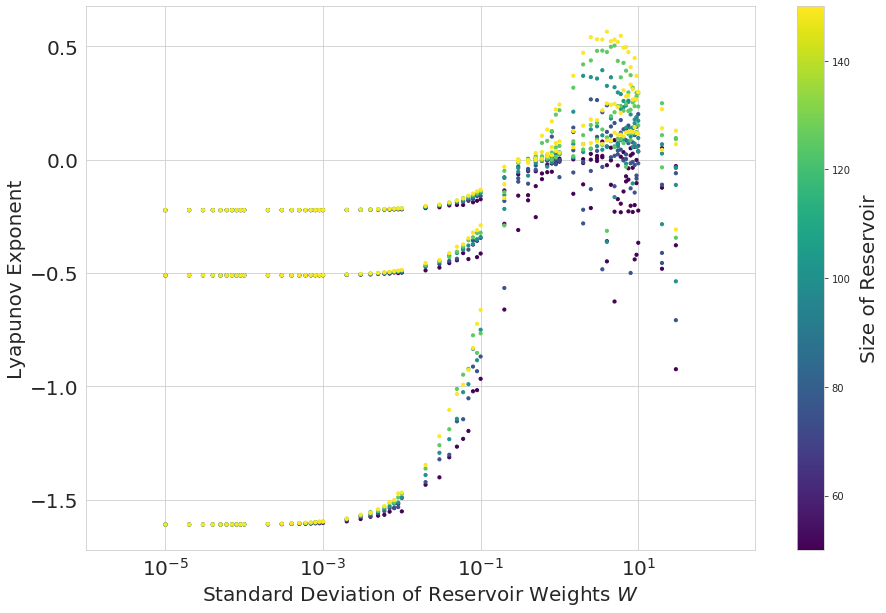

In [3]:
with open('random_reservoirs_LE_2.pickle', 'rb') as f:
    d = pickle.load(f)

# display(d)

filtered = d.query('Perturbation_Order == 1e-12 & Leak_Rate!=1.0')

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Standard Deviation of Reservoir Weights $\mathbf{\mathit{W}}$', fontsize=20)
ax.set_ylabel('Lyapunov Exponent', fontsize=20)
ax.set(xscale="log")
ax = plt.scatter(filtered['Weights_SD'], filtered['Lyapunov_Exponent'], s=10, c=filtered['Reservoir_Size'], \
                 cmap='viridis', vmin=50, vmax=150)
plt.colorbar().set_label("Size of Reservoir", fontsize=20, labelpad=10)
tick_params(labelsize=20)

plt.savefig('stdVSle.pdf')

# plt.scatter(dyn_complexity[['Lyapunov_Exponent']].values, dyn_complexity[['Spectral_Radius']].values, s=2)
# plt.xlabel('Lyapunov Exponent')
# plt.ylabel('Spectral Radius of $\mathbf{\mathit{W}}$')
# plt.xlim(-2, 2)
# plt.ylim(-1, 10)
# plt.show()

### LE vs Reservoir Size

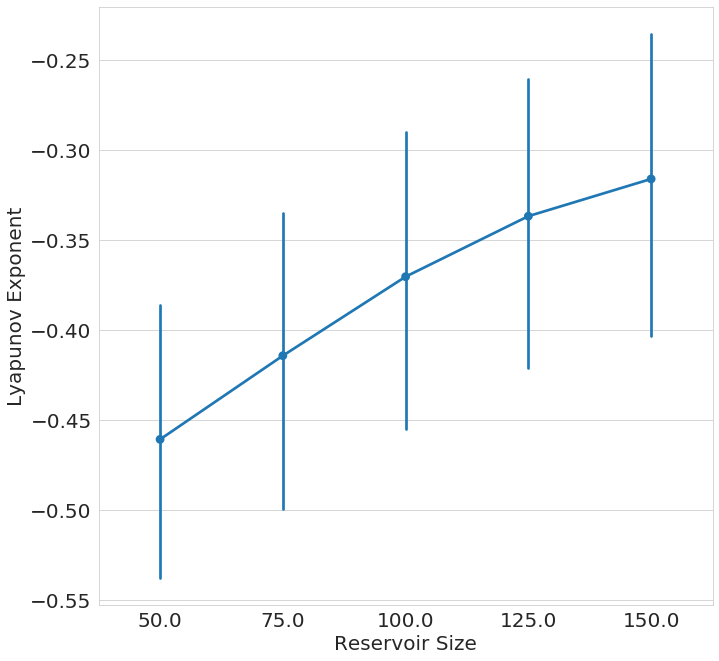

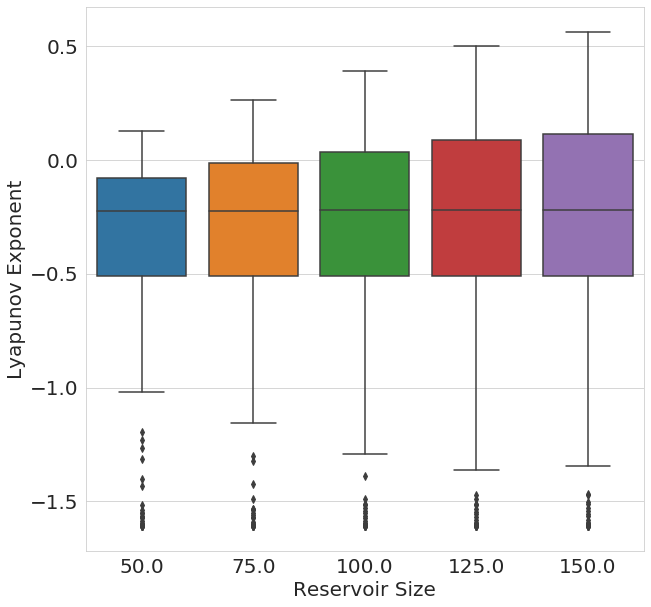

In [4]:
plt.figure(figsize=(11,11))
sns.set_style("whitegrid")
ax = sns.pointplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=filtered)#, hue='Reservoir_Size')
ax.set_xlabel('Reservoir Size', fontsize=20)
ax.set_ylabel('Lyapunov Exponent', fontsize=20)
ax.tick_params(labelsize=20)
# sns.despine(offset=0)
# plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

# plt.savefig('ResSizeVSle_.pdf')
# ax.set(xlabel='Leak Rate of Reservoir', ylabel='Lyapunov Exponent')
# sns.despine(offset=10, trim=True)
# sns.pointplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=dyn_complexity, hue='Leak_Rate')
#sns.xlim(0, 10)



plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
# ax = sns.boxplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=filtered)
ax = sns.boxplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=filtered)
ax.set_xlabel('Reservoir Size', fontsize=20)
ax.set_ylabel('Lyapunov Exponent', fontsize=20)
ax.tick_params(labelsize=20)
# sns.despine(offset=0, trim=True)
# plt.savefig('ResSizeVSle.pdf')


### LE vs Leak Rate

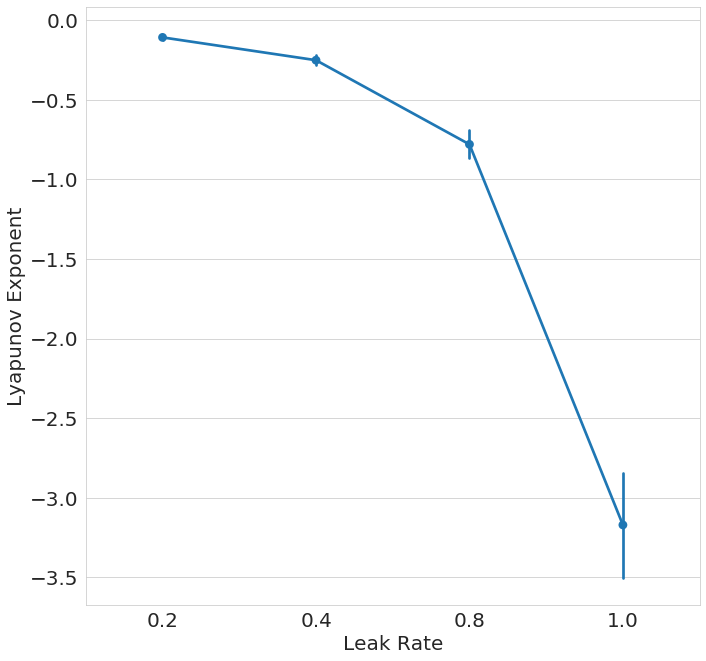

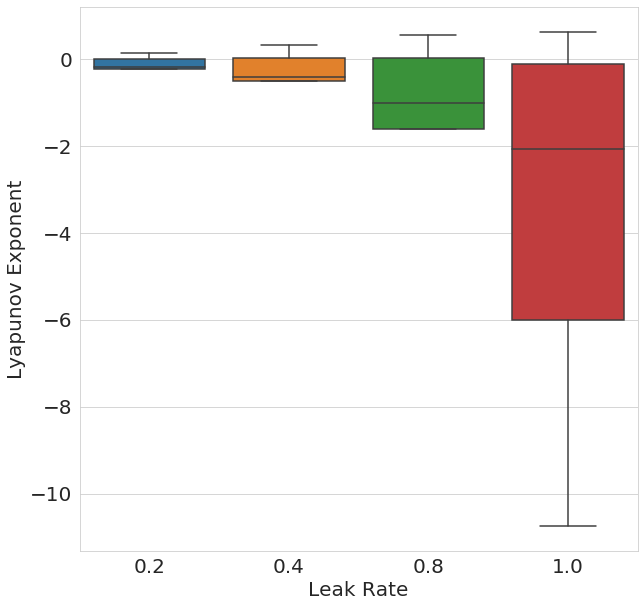

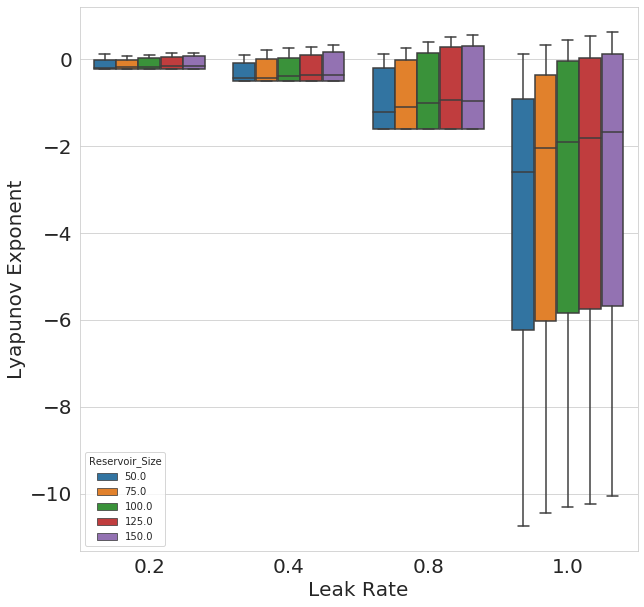

In [7]:
filtered = d.query('Perturbation_Order == 1e-12')

plt.figure(figsize=(11,11))
sns.set_style("whitegrid")
ax = sns.pointplot(x='Leak_Rate', y='Lyapunov_Exponent', data=filtered)#, hue='Reservoir_Size')
ax.set_xlabel('Leak Rate', fontsize=20)
ax.set_ylabel('Lyapunov Exponent', fontsize=20)
ax.tick_params(labelsize=20)
# sns.despine(offset=0)
# plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

# plt.savefig('ResSizeVSle_.pdf')
# ax.set(xlabel='Leak Rate of Reservoir', ylabel='Lyapunov Exponent')
# sns.despine(offset=10, trim=True)
# sns.pointplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=dyn_complexity, hue='Leak_Rate')
#sns.xlim(0, 10)



plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
# ax = sns.boxplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=filtered)
ax = sns.boxplot(x='Leak_Rate', y='Lyapunov_Exponent', data=filtered)
ax.set_xlabel('Leak Rate', fontsize=20)
ax.set_ylabel('Lyapunov Exponent', fontsize=20)
ax.tick_params(labelsize=20)
# sns.despine(offset=0, trim=True)
# plt.savefig('ResSizeVSle.pdf')




plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
# ax = sns.boxplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=filtered)
ax = sns.boxplot(x='Leak_Rate', y='Lyapunov_Exponent', data=filtered, hue='Reservoir_Size')
ax.set_xlabel('Leak Rate', fontsize=20)
ax.set_ylabel('Lyapunov Exponent', fontsize=20)
ax.tick_params(labelsize=20)
# sns.despine(offset=0, trim=True)
# plt.savefig('ResSizeVSle.pdf')
